In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 15B0YXLJhx41faA2rVyifWMjlmpuFqAxc


Downloading...
From: https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
To: /content/loan.csv
100% 38.0k/38.0k [00:00<00:00, 36.8MB/s]


In [ ]:
data = pd.read_csv('loan.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data = data.drop('Loan_ID', axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
cat_cols = data.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
num_cols = data.dtypes!='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

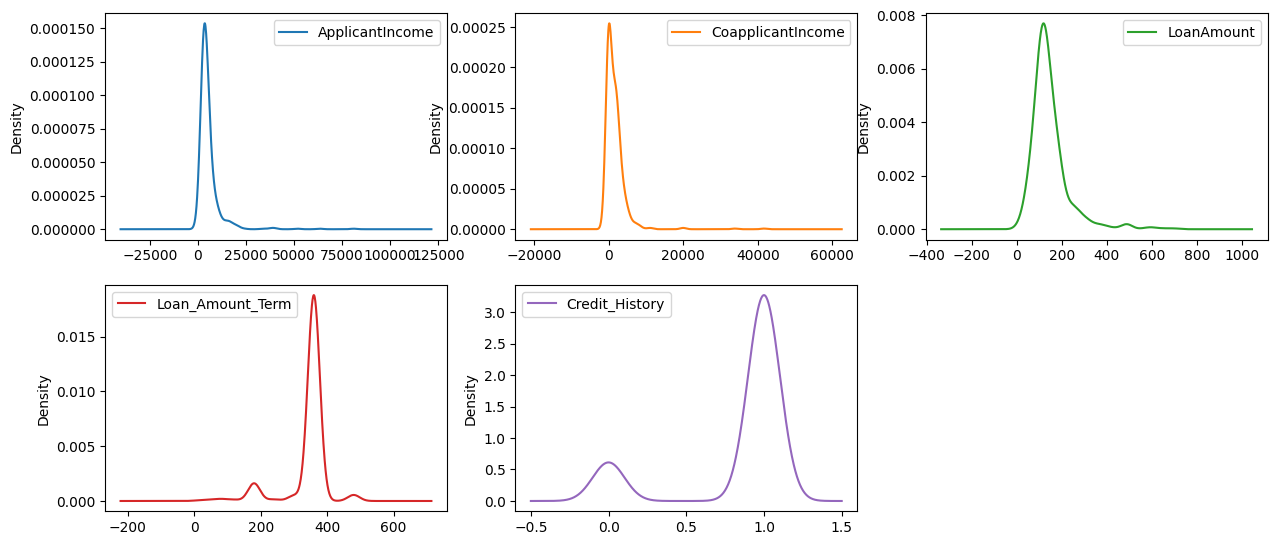

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.show()

In [ ]:
data.skew(numeric_only=True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [ ]:
data.kurt(numeric_only=True)

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

# Univariate Analysis

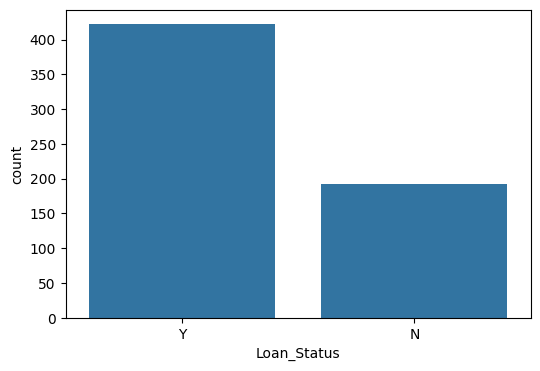

In [ ]:
plt.rcParams['figure.figsize']=[6, 4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

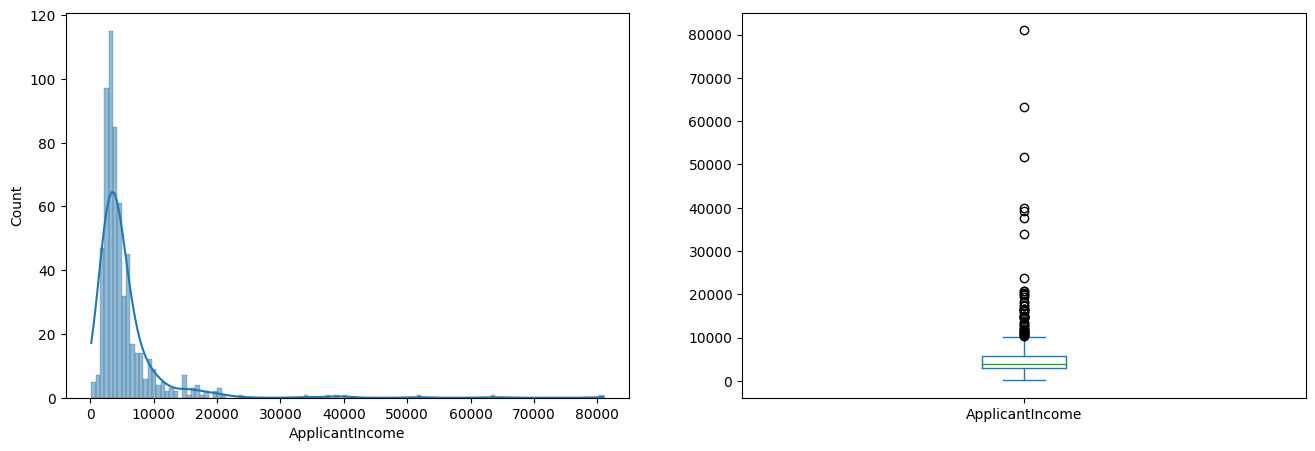

In [ ]:
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], kde=True)

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

In [ ]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
from scipy.stats import ttest_ind

a = data[data['Loan_Status'] == 'Y']['ApplicantIncome']
b = data[data['Loan_Status'] == 'N']['ApplicantIncome']

#H0: Income and LoanStus are independent
#Ha: Dependent

ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

In an Exploratory Data Analysis (EDA) process, you're analyzing a dataset of customer purchases.
You want to understand the distribution of the 'PurchaseAmount' variable.

What type of visualization would be most suitable for visualizing the distribution of a continuous variable?

In [ ]:
bins = [0, 2500, 4000, 6000, 8000, 10000, 20000, 40000, 81000]
group = ['low', 'average', 'medium', 'h1', 'h2', 'h3', 'h4', 'very high']

data['income_bin'] = pd.cut(data['ApplicantIncome'], bins, labels=group)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [ ]:
pd.crosstab(data['income_bin'], data['Loan_Status'])

Loan_Status,N,Y
income_bin,,
low,34,74
average,67,159
medium,45,98
h1,20,34
h2,9,22
h3,13,27
h4,3,6
very high,1,2


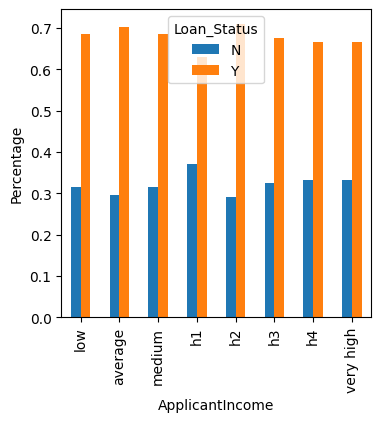

In [ ]:
income_bin = pd.crosstab(data['income_bin'], data['Loan_Status'], normalize='index')
income_bin.plot(kind='bar', figsize=(4, 4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data['income_bin'], columns=data['Loan_Status']).values
chi2_contingency(val)

Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

## Doubt Session -1

In [ ]:
data2 = data

In [ ]:
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,average
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1


In [ ]:
data2.dropna(inplace=True)
data2['NewFeature'] = (data2["ApplicantIncome"]) + (3 * data2["LoanAmount"]) + (7000 * data2["Credit_History"])
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,NewFeature
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,11967.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,10198.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,9943.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,13423.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,medium,13218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,average,10113.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium,11226.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2,15831.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1,15144.0


In [ ]:
data2['Sepearator'] = data2['NewFeature'] > (data2['NewFeature'].mean()*0.25)
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,NewFeature,Sepearator
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,11967.0,True
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,10198.0,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,9943.0,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,13423.0,True
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,medium,13218.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,average,10113.0,True
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium,11226.0,True
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2,15831.0,True
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1,15144.0,True


In [ ]:
contingency = pd.crosstab(data2['Sepearator'], data2['Loan_Status'])
p_val = chi2_contingency(contingency)[1]
round(p_val, 4)

0.0001

In [ ]:
contingency

Loan_Status,N,Y
Sepearator,,
False,11,2
True,137,330


# Creating New Features

In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

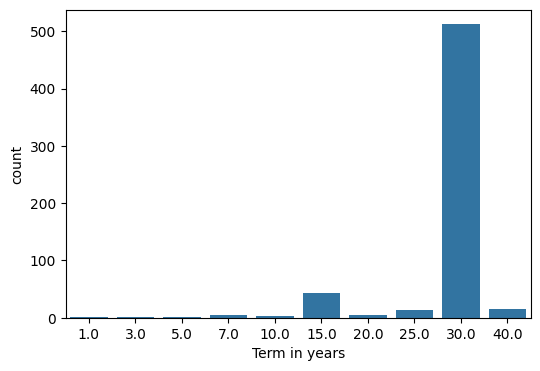

In [ ]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')
# Convert to years

sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

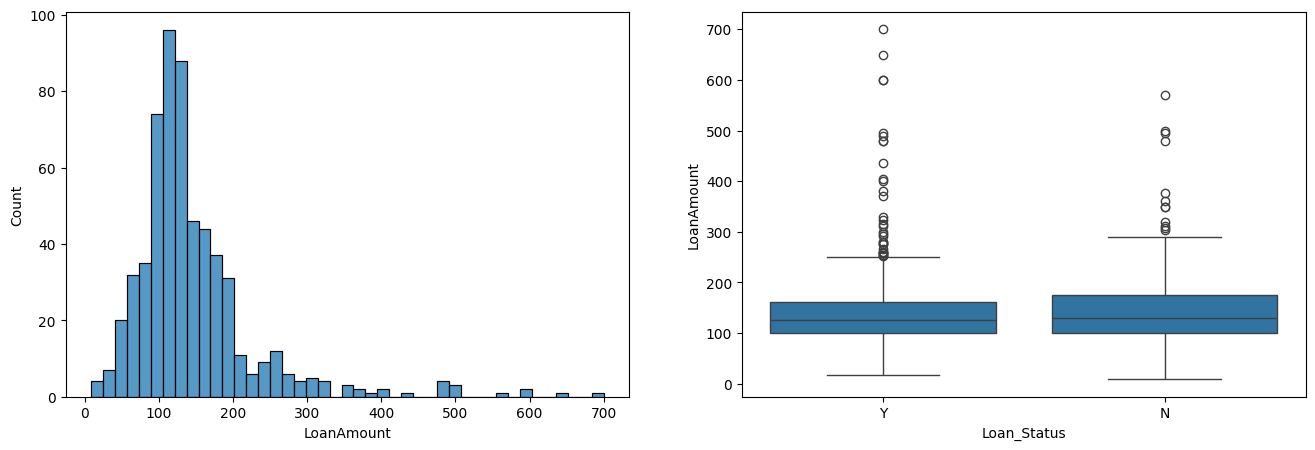

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [ ]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']
# Crude approximation without interest

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000


In [ ]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12 # Crude approximation without interest
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667


In [ ]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year,EMI,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN,NaN,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,2.200000,183.333333,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4.000000,333.333333,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667,6000.0


In [ ]:
# considering 30%
data['Able_to_pay_EMI'] = (data['TotalIncome']* 0.3 > data['EMI']).astype('int')

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year,EMI,TotalIncome,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,NaN,NaN,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667,6000.0,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

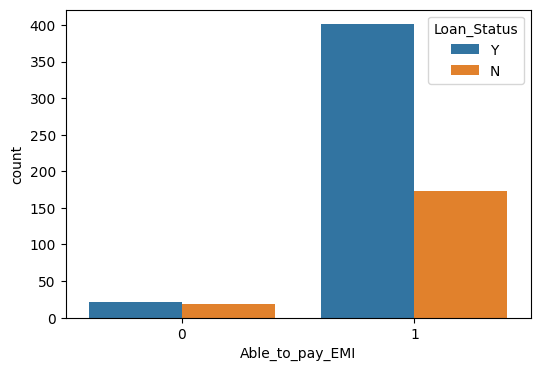

In [ ]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [ ]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,21
1,173,401


In [ ]:
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

In [ ]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

## Missing Values

In [ ]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': ((data.isnull().sum())/len(data)) *100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
CoapplicantIncome,0,0.000000


In [ ]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
data['Credit_History'].isnull().sum()

50

In [ ]:
pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(2)
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
2.0     50
Name: count, dtype: int64

In [ ]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
data['Self_Employed'].isnull().sum()

32

In [ ]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')
data['Self_Employed'].value_counts()

Self_Employed
No       500
Yes       82
Other     32
Name: count, dtype: int64

In [ ]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Other,9,23
Yes,26,56


In [ ]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.15849843135909122, pvalue=0.9238096679003514, dof=2, expected_freq=array([[156.35179153, 343.64820847],
       [ 10.00651466,  21.99348534],
       [ 25.64169381,  56.35830619]]))

In [ ]:
## Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [ ]:
a.mean()

0    20.0
dtype: float64

In [ ]:
SimpleImputer(strategy='mean').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [ ]:
SimpleImputer(strategy='median').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [ ]:
SimpleImputer(strategy='most_frequent').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [ ]:
SimpleImputer(strategy='constant', fill_value=1000).fit_transform(a)

array([[  10.],
       [  10.],
       [  20.],
       [  10.],
       [  30.],
       [  10.],
       [1000.],
       [  50.]])

In [ ]:
# Missing numeric columns

# set of columns
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

# instance of simple imputer class with a median strategy
median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
cat_missing = ['Gender', 'Married']
freq_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_missing:
  data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isna().sum()

Gender                   0
Married                  0
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
income_bin               0
Loan_Amount_per_year     0
EMI                      0
TotalIncome              0
Able_to_pay_EMI          0
dtype: int64

In [ ]:
df_num = data.select_dtypes(include=np.number)
df_num.drop(['Credit_History', 'Able_to_pay_EMI'], axis=1, inplace=True)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Amount_per_year,EMI,TotalIncome
0,5849,0.0,128.0,30.0,4.383333,365.277778,5849.0
1,4583,1508.0,128.0,30.0,4.266667,355.555556,6091.0
2,3000,0.0,66.0,30.0,2.200000,183.333333,3000.0
3,2583,2358.0,120.0,30.0,4.000000,333.333333,4941.0
4,6000,0.0,141.0,30.0,4.700000,391.666667,6000.0


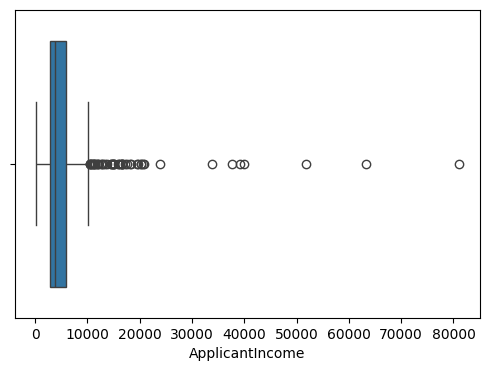

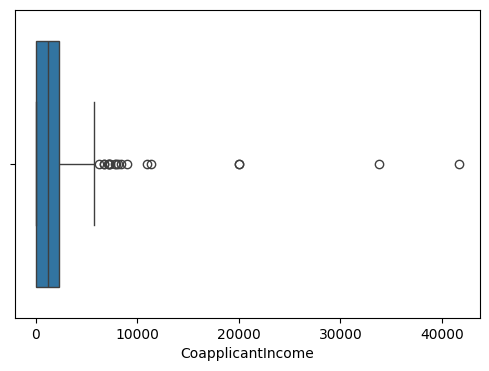

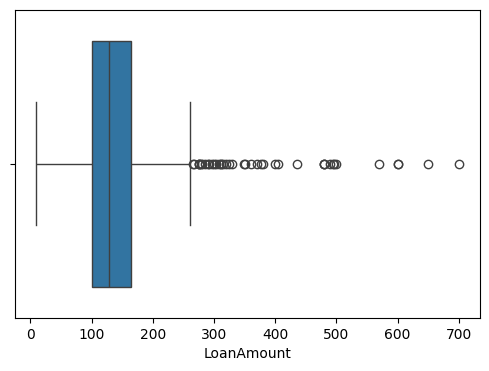

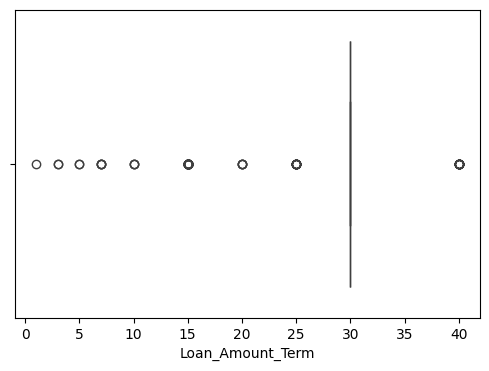

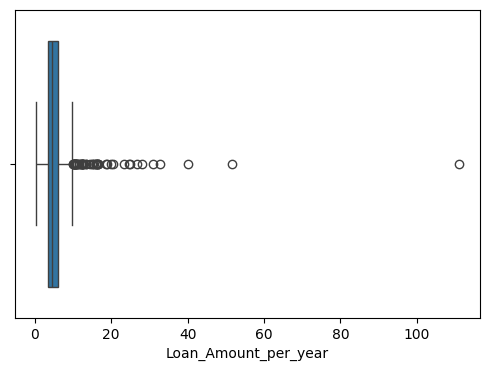

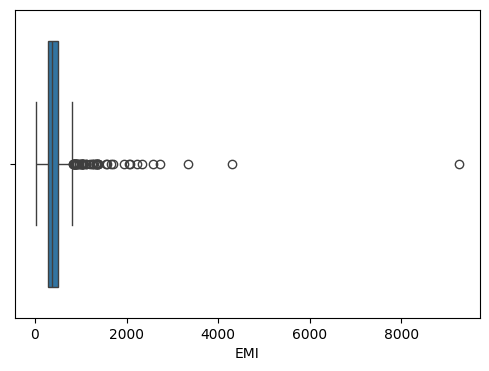

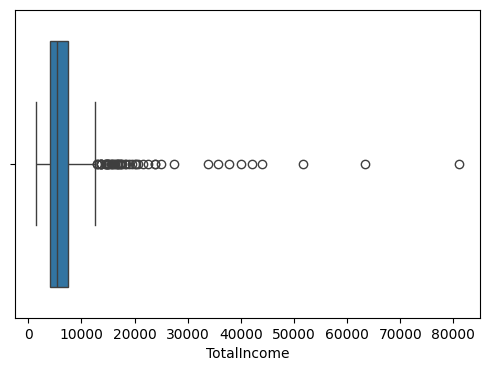

In [ ]:
for col in enumerate(df_num):
  sns.boxplot(x=col[1], data=df_num)
  plt.show()

In [ ]:
# IQR Method

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
print(IQR)

ApplicantIncome         2917.500000
CoapplicantIncome       2297.250000
LoanAmount                64.500000
Loan_Amount_Term           0.000000
Loan_Amount_per_year       2.500000
EMI                      208.333333
TotalIncome             3355.750000
dtype: float64


In [ ]:
df_iqr = data[~((df_num< (Q1-1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
df_iqr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year,EMI,TotalIncome,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,medium,4.383333,365.277778,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,4.700000,391.666667,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,30.0,1.0,Rural,Y,average,3.600000,300.000000,5182.0,1
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,average,2.366667,197.222222,2900.0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,h2,8.433333,702.777778,8312.0,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,h1,6.233333,519.444444,7583.0,1


In [ ]:
df_iqr.shape

(458, 17)

In [ ]:
df_num.shape

(614, 7)

In [ ]:
# Z-Score

In [ ]:
from scipy import stats

In [ ]:
z_scores_loanamount = stats.zscore(df_num['LoanAmount'])
z_scores_loanamount

0     -0.211241
1     -0.211241
2     -0.948996
3     -0.306435
4     -0.056551
         ...   
609   -0.889500
610   -1.258378
611    1.276168
612    0.490816
613   -0.151745
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
row_index_less = np.where(z_scores_loanamount<-3)
row_index_less

(array([], dtype=int64),)

In [ ]:
row_index_more = np.where(z_scores_loanamount > 3)
row_index_more

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
        561, 604]),)

In [ ]:
df_LoanAmount_zscore = data["LoanAmount"][~((z_scores_loanamount < -3) |(z_scores_loanamount > 3))]
df_LoanAmount_zscore.shape

(599,)

In [ ]:
df_cat = data.select_dtypes(include=['object'])
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col = 'Loan_Status'
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,Loan_Amount_per_year,EMI,TotalIncome,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,medium,4.383333,365.277778,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,medium,4.700000,391.666667,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,1,average,2.366667,197.222222,2900.0,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,1,medium,2.666667,222.222222,4106.0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,1,h2,8.433333,702.777778,8312.0,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,1,h1,6.233333,519.444444,7583.0,1


In [ ]:
col = 'Gender'
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()


col = 'Married'
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [ ]:
col='Property_Area'
data[col].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [ ]:
## Target Encoding

In [ ]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 824.8 kB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
pd.crosstab(data['Property_Area'], data['Loan_Status'], normalize='index')

Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [ ]:
col='Property_Area'
te = TargetEncoder()
data[col] = te.fit_transform(data[col], data['Loan_Status'])
data[col].value_counts()

Property_Area
0.768240    233
0.658416    202
0.614525    179
Name: count, dtype: int64

In [ ]:
num = df_num

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
num['minmax_LoanAmount'] = min_max.fit_transform(num[['LoanAmount']])

# minimum and maximum value of the normalized variable
num['minmax_LoanAmount'].min(), num['minmax_LoanAmount'].max()




(0.0, 1.0)

In [ ]:
data['LoanAmount'].max()

700.0

<ipython-input-175-6867cc39156a>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num['LoanAmount'], axlabel='LoanAmount')
<ipython-input-175-6867cc39156a>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num['minmax_LoanAmount'], axlabel='Scaled LoanAmount')


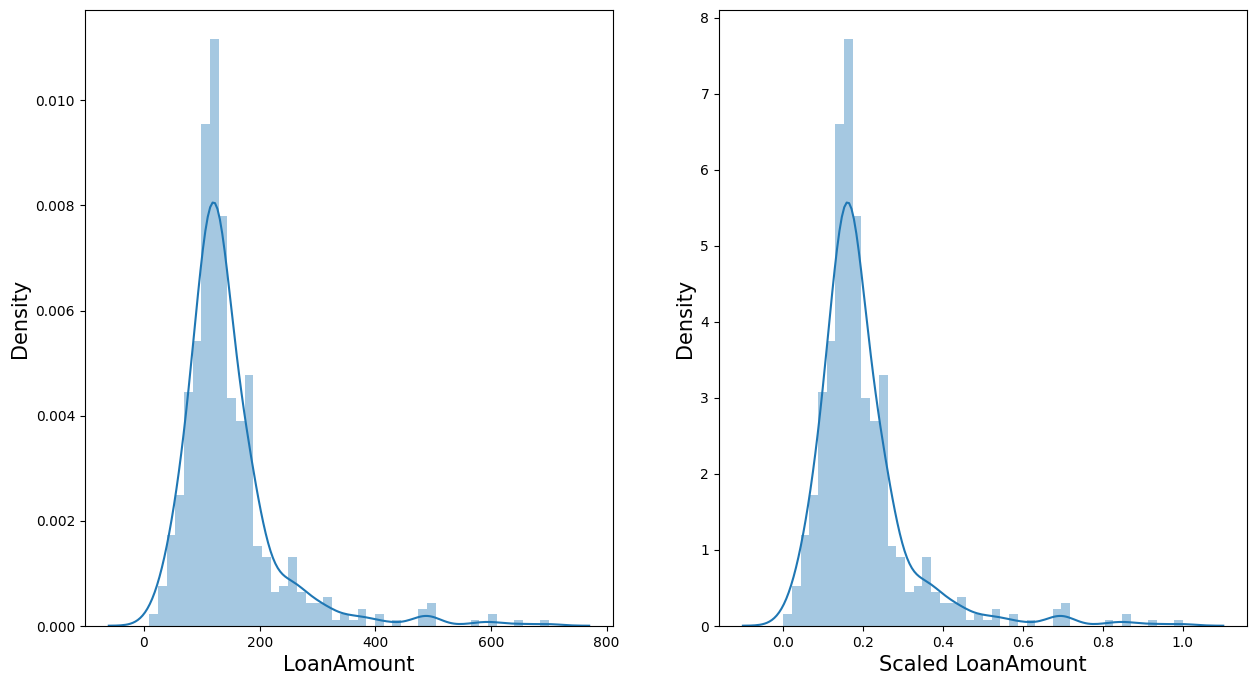

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# We create a subplot of 1 row by 2 columns
# use the first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'], axlabel='LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('LoanAmount', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['minmax_LoanAmount'], axlabel='Scaled LoanAmount')
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)

# display the plot
plt.show()

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
num['Scaled_LoanAmount'] = standard_scale.fit_transform(num[['LoanAmount']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",num['Scaled_LoanAmount'].min(),"\n",
      "The maximum value of the sales:", num['Scaled_LoanAmount'].max())

 The minimum value of the sales: -1.627255298188799 
 The maximum value of the sales: 6.59514560674599


<ipython-input-177-2bc226c668a7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num['LoanAmount'])
<ipython-input-177-2bc226c668a7>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num['Scaled_LoanAmount'])


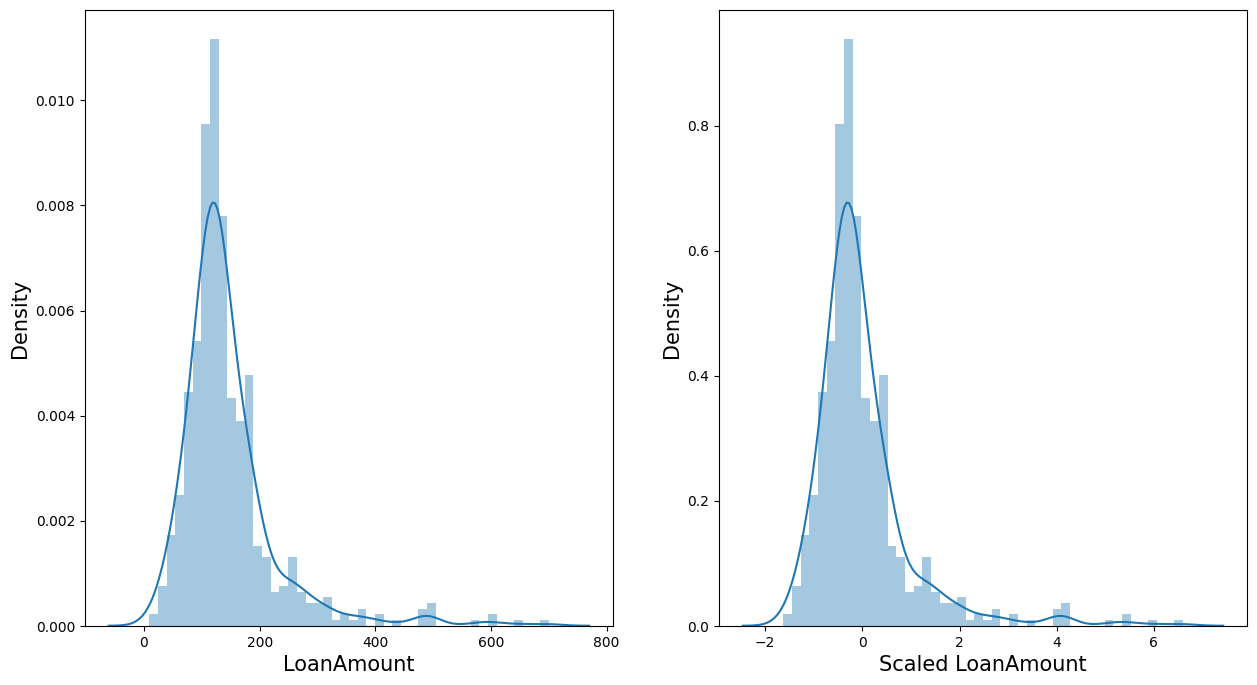

In [ ]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of the original variable
# axlabel: label the x-axis
sns.distplot(num['LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('LoanAmount', fontsize=15)

# We create a subplot of 1 row by 2 columns
# use the second column for plotting
plt.subplot(1,2,2)

# plot the distribution of the scaled variable
# axlabel: label the x-axis
sns.distplot(num['Scaled_LoanAmount'])
# set label for the y-axis
plt.ylabel('Density', fontsize=15)
# set label for the x-axis
plt.xlabel('Scaled LoanAmount', fontsize=15)
# display the plot
plt.show()

In [ ]:
# check the mean and standard deviation of the scaled variable
print("The mean of the scaled variable:", num['Scaled_LoanAmount'].mean(),"\n",
      "The standard deviation of the scaled variable:", num['Scaled_LoanAmount'].std())

The mean of the scaled variable: -2.603780383485709e-17 
 The standard deviation of the scaled variable: 1.0008153283050325


In [ ]:
z